In [ ]:
Delta-X Workshop

Water Quality Indicators


Fichot, C.G., J. Harringmeyer, and M. Weiser. 2021. Delta-X: In Situ Water Quality Indicators across MRD, LA, USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1992
https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1992
    
    

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

field_path = os.getcwd()


In [79]:
##PC
summary_file = pd.read_csv(field_path + "\DeltaX_Insitu_WQ_Indicators_1992\data\DeltaX_WaterQualityIndicators_Spring2021.csv")
##MAC
#summary_file = pd.read_csv(field_path + "/DeltaX_Insitu_WQ_Indicators_1992/data/DeltaX_WaterQualityIndicators_Spring2021.csv")


#remove samples that were not collected
summary_file = summary_file[summary_file['turbidity']!='not_collected']
summary_file.head()



,basin,site_id,campaign,latitude,longitude,date,time,depth,turbidity,standard_deviation_of_turbidity,salinity,standard_deviation_of_salinity,temperature,standard_deviation_of_temperature,chlorophyll_a_fluorescence,standard_deviation_of_chlorophyll_a_fluorescence
0,Terrebonne,TB_0405_D1,Spring 2021,29.262435,-90.935865,4/5/21,20:34,0.5,21.73,0.06,7.28,0.01,20.44,0,10.09,0.01
1,Terrebonne,TB_0405_S1,Spring 2021,29.343312,-90.885895,4/5/21,15:30,0.5,10.28,0.1,2.15,0,19.94,0,5.26,0.13
2,Terrebonne,TB_0405_S2,Spring 2021,29.258782,-90.928929,4/5/21,17:15,0.5,21.68,0.56,4.38,0,19.28,0,9.14,0.96
3,Terrebonne,TB_0405_S3,Spring 2021,29.133525,-90.833530,4/5/21,18:15,0.5,9.88,1.27,20.05,0.06,19.92,0.16,4.42,0.26
4,Terrebonne,TB_0405_S4,Spring 2021,29.170795,-90.825446,4/5/21,19:18,0.5,9.42,0.21,16.25,0.05,21.33,0.05,4.17,0.33


In [144]:
water_quality = summary_file[['basin','turbidity','temperature ','salinity','chlorophyll_a_fluorescence']]
water_quality = water_quality.astype({'turbidity':'float','temperature ':'float','salinity':'float','chlorophyll_a_fluorescence':'float'})

means = water_quality.groupby('basin')[['turbidity','temperature ','salinity','chlorophyll_a_fluorescence']].agg(np.mean)
stds = water_quality.groupby('basin')[['turbidity','temperature ','salinity','chlorophyll_a_fluorescence']].agg(np.std)


,turbidity,temperature,salinity,chlorophyll_a_fluorescence
basin,,,,
Atchafalaya,46.146071,16.298929,0.137143,3.025536
Terrebonne,22.260364,21.322727,7.315091,8.390909


[Text(0.5, 0, 'Channel/Tide'),
 Text(0, 0.5, 'Chlorophyll A Fluorescence'),
 (2.0, 14.0)]

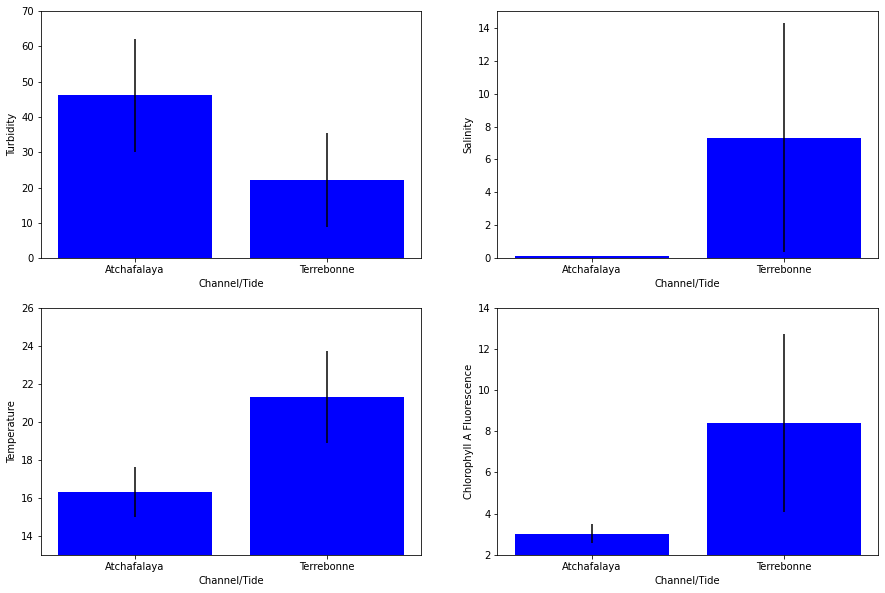

In [150]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))
ax1.bar(means.index, means['turbidity'].astype(float), yerr = stds['turbidity'].astype(float),
        color ='blue')
ax1.set(xlabel='Channel/Tide', ylabel='Turbidity',ylim=[0,70])

ax2.bar(means.index, means['salinity'].astype(float), yerr = stds['salinity'].astype(float),
        color ='blue')
ax2.set(xlabel='Channel/Tide', ylabel='Salinity',ylim=[0,15])

ax3.bar(means.index, means['temperature '].astype(float), yerr = stds['temperature '].astype(float),
        color ='blue')
ax3.set(xlabel='Channel/Tide', ylabel='Temperature',ylim=[13,26])

ax4.bar(means.index, means['chlorophyll_a_fluorescence'].astype(float), yerr = stds['chlorophyll_a_fluorescence'].astype(float),
        color ='blue')
ax4.set(xlabel='Channel/Tide', ylabel='Chlorophyll A Fluorescence',ylim=[2,14])




Let's look at a particular study area: CRMS 0421. 
Four samples were collected here, we will select only those and compare water quality variables for those sites.



Samples TB_0405 (high tide) and TB_0422 (rising tide) are in the larger channel, collected on different days.

Samples TB_0409 (rising tide) and TB_0417 (high tide) are in the smaller channel, collected on differnet days.


In [54]:
sites_CRMS0421 = ['TB_0405_S4','TB_0422_S1','TB_0417_S1','TB_0409_S2']
CRMS0421 = summary_file[summary_file['site_id'].isin(sites_CRMS0421)]


In [74]:
## Add in tide information from tide data

channel_info = ['Large/High Tide','Small/Rising Tide','Small/High Tide','Large/Rising Tide']
CRMS0421['channel'] = channel_info

CRMS0421.columns


C:\Users\Lena\AppData\Local\Temp\ipykernel_10248\2324226258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRMS0421['channel'] = channel_info


Index(['basin', 'site_id', 'campaign', 'latitude', 'longitude', 'date', 'time',
       'depth', 'turbidity', 'standard_deviation_of_turbidity ', 'salinity',
       'standard_deviation_of_salinity', 'temperature ',
       'standard_deviation_of_temperature', 'chlorophyll_a_fluorescence',
       'standard_deviation_of_chlorophyll_a_fluorescence', 'channel'],
      dtype='object')

[Text(0.5, 0, 'Channel/Tide'),
 Text(0, 0.5, 'Chlorophyll A Fluorescence'),
 (4.0, 15.0)]

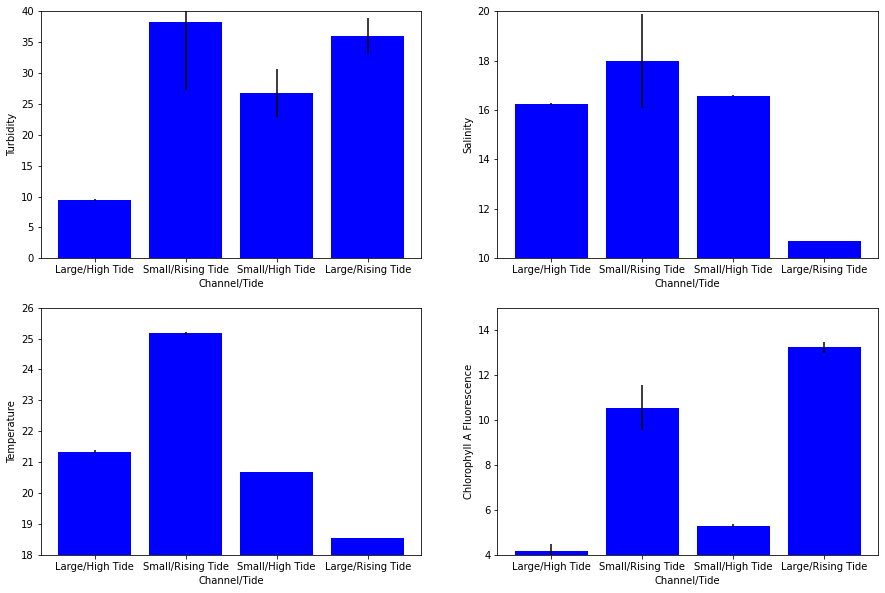

In [77]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))
ax1.bar(CRMS0421['channel'], CRMS0421['turbidity'].astype(float), yerr = CRMS0421['standard_deviation_of_turbidity '].astype(float),
        color ='blue')
ax1.set(xlabel='Channel/Tide', ylabel='Turbidity',ylim=[0,40])

ax2.bar(CRMS0421['channel'], CRMS0421['salinity'].astype(float), yerr = CRMS0421['standard_deviation_of_salinity'].astype(float),
        color ='blue')
ax2.set(xlabel='Channel/Tide', ylabel='Salinity',ylim=[10,20])

ax3.bar(CRMS0421['channel'], CRMS0421['temperature '].astype(float), yerr = CRMS0421['standard_deviation_of_temperature'].astype(float),
        color ='blue')
ax3.set(xlabel='Channel/Tide', ylabel='Temperature',ylim=[18,26])

ax4.bar(CRMS0421['channel'], CRMS0421['chlorophyll_a_fluorescence'].astype(float), yerr = CRMS0421['standard_deviation_of_chlorophyll_a_fluorescence'].astype(float),
        color ='blue')
ax4.set(xlabel='Channel/Tide', ylabel='Chlorophyll A Fluorescence',ylim=[4,15])


[Text(0.5, 0, 'Chlorophyll_a_fluorescence'), Text(0, 0.5, 'Temperature')]

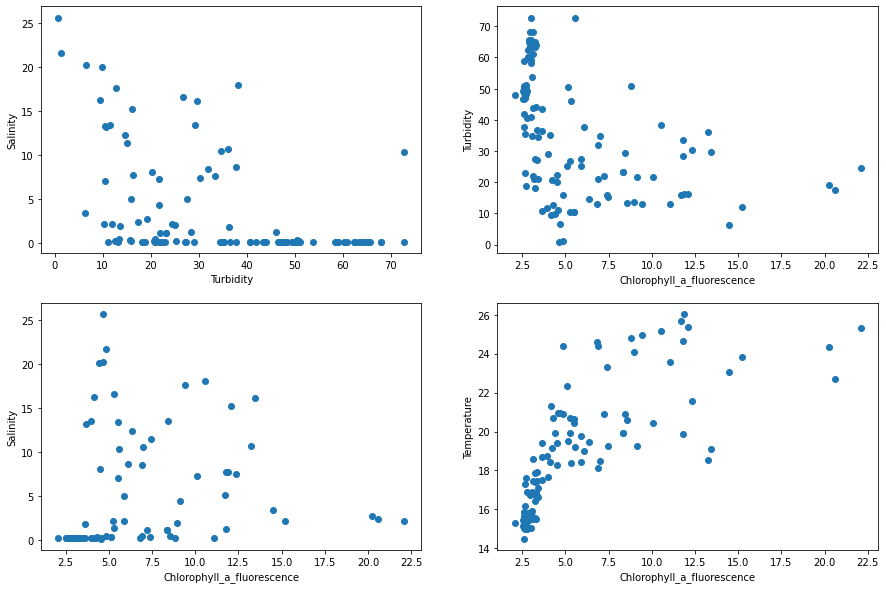

In [85]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))
ax1.scatter(summary_file['turbidity'].astype(float), summary_file['salinity'].astype(float))
ax1.set(xlabel='Turbidity', ylabel='Salinity')

ax2.scatter(summary_file['chlorophyll_a_fluorescence'].astype(float), summary_file['turbidity'].astype(float))
ax2.set(xlabel='Chlorophyll_a_fluorescence', ylabel='Turbidity')

ax3.scatter(summary_file['chlorophyll_a_fluorescence'].astype(float), summary_file['salinity'].astype(float))
ax3.set(xlabel='Chlorophyll_a_fluorescence', ylabel='Salinity')

ax4.scatter(summary_file['chlorophyll_a_fluorescence'].astype(float), summary_file['temperature '].astype(float))
ax4.set(xlabel='Chlorophyll_a_fluorescence', ylabel='Temperature')